In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
train_Path = 'C:\\Users\\eesha\\Desktop\\Alz Detection\\Dataset-3\\archive (1)\\Alzheimers-ADNI\\test'
test_Path = 'C:\\Users\\eesha\\Desktop\\Alz Detection\\Dataset-3\\archive (1)\\Alzheimers-ADNI\\train'

In [4]:
IMAGE_SIZE = [224, 224]

In [5]:
resnet = ResNet50(
    input_shape = IMAGE_SIZE +[3], 
    weights = 'imagenet', # Default weights.
    include_top = False   # 
)

In [6]:
for layer in resnet.layers:
    layer.trainable = False

In [7]:
folders = glob(train_Path + '/*')
folders

['C:\\Users\\eesha\\Desktop\\Alz Detection\\Dataset-3\\archive (1)\\Alzheimers-ADNI\\test\\Final AD JPEG',
 'C:\\Users\\eesha\\Desktop\\Alz Detection\\Dataset-3\\archive (1)\\Alzheimers-ADNI\\test\\Final CN JPEG',
 'C:\\Users\\eesha\\Desktop\\Alz Detection\\Dataset-3\\archive (1)\\Alzheimers-ADNI\\test\\Final EMCI JPEG',
 'C:\\Users\\eesha\\Desktop\\Alz Detection\\Dataset-3\\archive (1)\\Alzheimers-ADNI\\test\\Final LMCI JPEG',
 'C:\\Users\\eesha\\Desktop\\Alz Detection\\Dataset-3\\archive (1)\\Alzheimers-ADNI\\test\\Final MCI JPEG']

In [8]:
alz_label = ['AD', 'CN', 'EMCI', 'LMCI', 'MCI']

In [9]:
# Set the flatten layer.
x = Flatten() (resnet.output)

In [10]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [11]:
model = Model(inputs = resnet.input, outputs = prediction)

In [12]:
model.compile (
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [13]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [14]:
train_Path

'C:\\Users\\eesha\\Desktop\\Alz Detection\\Dataset-3\\archive (1)\\Alzheimers-ADNI\\test'

In [15]:
training_set = train_datagen.flow_from_directory(
    train_Path,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical' # As we have more than 2 so using categorical
)

Found 195 images belonging to 5 classes.


In [16]:
test_set = train_datagen.flow_from_directory(
    test_Path,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1101 images belonging to 5 classes.


In [17]:
from imblearn.over_sampling import SMOTE
from tqdm import tqdm

In [18]:
img, label = next(training_set)
X_train = list(img)
y_train = list(label)

for i in tqdm(range(int(len(training_set))-1)): #1st batch is already fetched before the for loop.
  img, label = next(training_set)
  X_train += list(img)
  y_train +=  list(label)

X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape, y_train.shape)

100%|██████████| 6/6 [00:02<00:00,  2.44it/s]

(195, 224, 224, 3) (195, 5)


In [19]:
X_train.shape

(195, 224, 224, 3)

In [20]:
print(X_train.shape, y_train.shape)

(195, 224, 224, 3) (195, 5)


In [21]:
X_train_Reshape = X_train.reshape(195, 224*224*3)

In [22]:
X_train_Reshape.shape

(195, 150528)

In [23]:
sm = SMOTE(k_neighbors=10)
X_smote, y_smote = tqdm(sm.fit_resample(X_train_Reshape, y_train))

100%|██████████| 2/2 [00:00<?, ?it/s]


In [24]:
X_smote.shape

(435, 150528)

In [25]:
np.argmax(y_smote,axis=1).shape

(435,)

In [26]:
np.unique(np.argmax(y_smote,axis=1), return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int64), array([87, 87, 87, 87, 87], dtype=int64))

In [28]:
X_train_Reshape1 = np.reshape(X_smote, (435,224,224,3))

In [29]:
X_train_Reshape1.shape

(435, 224, 224, 3)

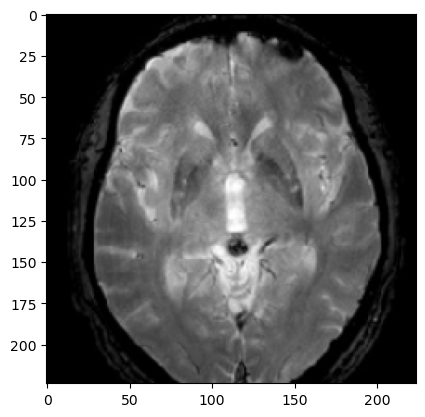

In [30]:
plt.imshow(X_train[1])

In [31]:
# Fit the model.

history = model.fit(
    X_train_Reshape1,y_smote,
    validation_split=0.2,
    epochs = 50,
    batch_size = 32
)

Epoch 1/50
11/11 [==============================] - 22s 2s/step - loss: 5.6165 - accuracy: 0.2155 - val_loss: 13.4332 - val_accuracy: 0.0000e+00
Epoch 2/50
11/11 [==============================] - 20s 2s/step - loss: 3.4523 - accuracy: 0.2586 - val_loss: 5.1452 - val_accuracy: 0.0000e+00
Epoch 3/50
11/11 [==============================] - 19s 2s/step - loss: 2.0603 - accuracy: 0.2989 - val_loss: 7.1820 - val_accuracy: 0.0460
Epoch 4/50
11/11 [==============================] - 19s 2s/step - loss: 1.8990 - accuracy: 0.3276 - val_loss: 4.7792 - val_accuracy: 0.0000e+00
Epoch 5/50
11/11 [==============================] - 19s 2s/step - loss: 2.0091 - accuracy: 0.2845 - val_loss: 5.4128 - val_accuracy: 0.0000e+00
Epoch 6/50
11/11 [==============================] - 20s 2s/step - loss: 2.1012 - accuracy: 0.2989 - val_loss: 4.0151 - val_accuracy: 0.0000e+00
Epoch 7/50
11/11 [==============================] - 20s 2s/step - loss: 1.8295 - accuracy: 0.3161 - val_loss: 2.6193 - val_accuracy: 0.0115

In [32]:
y_smote.shape

(435, 5)

In [33]:
img, label = next(test_set)
X_test = list(img)
y_test = list(label)

for i in tqdm(range(int(len(test_set))-1)): #1st batch is already fetched before the for loop.
  img, label = next(test_set)
  X_test += list(img)
  y_test +=  list(label)

X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_test.shape, y_test.shape)

100%|██████████| 34/34 [00:18<00:00,  1.88it/s]

(1101, 224, 224, 3) (1101, 5)


In [34]:
X_test.shape

(1101, 224, 224, 3)

In [35]:
print(X_test.shape, y_test.shape)

(1101, 224, 224, 3) (1101, 5)


In [37]:
X_test_Reshape = X_test.reshape(1101, 224*224*3)

In [38]:
X_test_Reshape.shape

(1101, 150528)

In [39]:
sm = SMOTE(k_neighbors=10)
X_smote, y_test_smote = sm.fit_resample(X_test_Reshape, y_test)

In [40]:
X_smote.shape

(2465, 150528)

In [41]:
np.argmax(y_test_smote,axis=1).shape

(2465,)

In [42]:
np.unique(np.argmax(y_test_smote,axis=1), return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int64),
 array([493, 493, 493, 493, 493], dtype=int64))

In [44]:
X_test_Reshape1 = np.reshape(X_smote, (2465,224,224,3))

In [45]:
X_test_Reshape1.shape

(2465, 224, 224, 3)

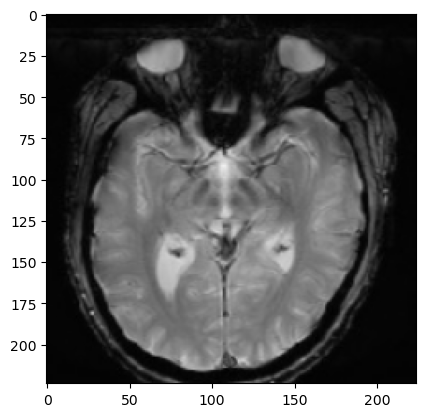

In [46]:
from matplotlib import pyplot as plt
plt.imshow(X_test_Reshape1[1])

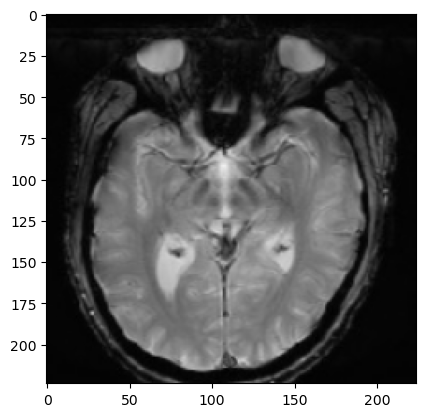

In [47]:
plt.imshow(X_test[1])

In [48]:
history.history

{'loss': [5.616461277008057,
  3.4522740840911865,
  2.060307025909424,
  1.8989508152008057,
  2.0091044902801514,
  2.101184129714966,
  1.8294752836227417,
  1.5108325481414795,
  1.4502592086791992,
  1.4991536140441895,
  1.3621996641159058,
  1.542690634727478,
  1.5737512111663818,
  1.5419479608535767,
  1.7703611850738525,
  1.4669491052627563,
  1.2862544059753418,
  1.285691261291504,
  1.2630783319473267,
  1.5799943208694458,
  1.7537190914154053,
  1.546364665031433,
  1.3850831985473633,
  1.4173343181610107,
  1.535887598991394,
  1.3309266567230225,
  1.3237508535385132,
  1.1480648517608643,
  1.2932556867599487,
  1.4790157079696655,
  1.4818322658538818,
  1.5593492984771729,
  1.314719319343567,
  1.3588593006134033,
  1.372983455657959,
  1.1805325746536255,
  1.016364336013794,
  1.0990746021270752,
  1.0585479736328125,
  0.9604771137237549,
  0.9125718474388123,
  0.9649953842163086,
  0.904623806476593,
  0.851898729801178,
  0.859231173992157,
  1.03249931335

In [49]:
results = model.evaluate(X_test_Reshape1, y_test_smote)

78/78 [==============================] - 121s 2s/step - loss: 2.2687 - accuracy: 0.2402


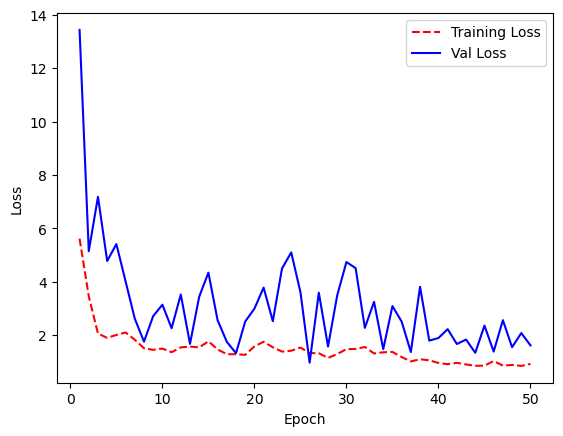

In [50]:
# Get training and test loss histories
training_loss = history.history['loss']
testing_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, testing_loss, 'b-')
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

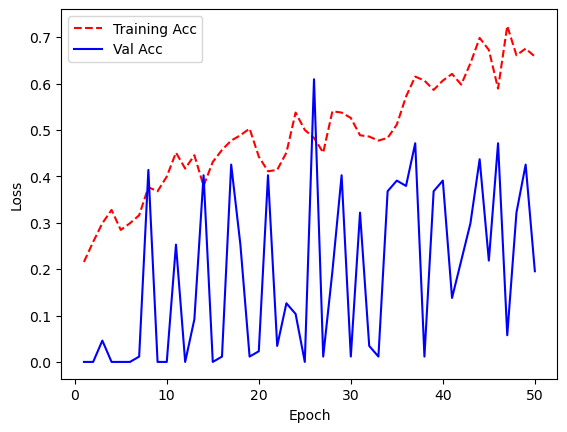

In [77]:
# Get training and test loss histories
training_loss = history.history['accuracy']
testing_loss = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, testing_loss, 'b-')
plt.legend(['Training Acc', 'Val Acc'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [52]:
y_pred = model.predict(X_test_Reshape1)

78/78 [==============================] - 132s 2s/step


In [54]:
# Calculating ROC-AUC
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other

n_classes = 5 # number of class

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_smote[:, i], y_pred[:, i], )
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_smote.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

C:\Users\eesha\AppData\Local\Temp\ipykernel_10196\3010557118.py:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


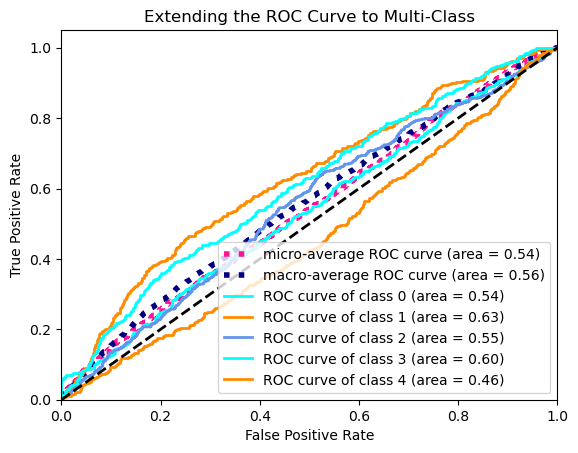

In [56]:
# Process of plotting roc-auc curve belonging to all classes.

from itertools import cycle
roc_auc_scores = []
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    roc_auc_scores.append(roc_auc[i])

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extending the ROC Curve to Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [57]:
from kerastuner.tuners import RandomSearch
from tensorflow import keras

def build_model1(hp):
    hp_activation = hp.Choice('activation', values = ['relu', 'tanh', 'softmax'])
    prediction = Dense(len(folders), activation = hp_activation)(x)
    model = Model(inputs = resnet.input, outputs = prediction)
    
    model.compile (
        loss = 'categorical_crossentropy',
        optimizer = keras.optimizers.Adam(
            hp.Choice('learning_rate',
                     values = [1e-2, 1e-3,1e-4, 1e-5, 1e-6])),
        metrics = ['accuracy']
        )
    return model
    

C:\Users\eesha\AppData\Local\Temp\ipykernel_10196\41272456.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [65]:
tuner1 = RandomSearch(
    build_model1,
    objective = 'val_accuracy',
    overwrite=False,
    max_trials = 5,
    executions_per_trial=3,
    directory=r'C:\\Users\\eesha\\Desktop\\dir1'
    )

In [66]:
tuner1.search_space_summary()

Search space summary
Default search space size: 2
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'softmax'], 'ordered': False}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001, 1e-05, 1e-06], 'ordered': True}


In [67]:
tuner1.search(X_train_Reshape1, y_smote,
            epochs=5,
            validation_data=(X_test_Reshape1, y_test_smote))

Trial 5 Complete [00h 39m 18s]
val_accuracy: 0.23813387751579285

Best val_accuracy So Far: 0.2451656460762024
Total elapsed time: 03h 12m 36s
INFO:tensorflow:Oracle triggered exit


In [68]:
tuner1.results_summary()

Results summary
Results in C:\\Users\\eesha\\Desktop\\dir1\untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
activation: softmax
learning_rate: 0.01
Score: 0.2451656460762024
Trial summary
Hyperparameters:
activation: relu
learning_rate: 0.0001
Score: 0.23813387751579285
Trial summary
Hyperparameters:
activation: softmax
learning_rate: 1e-05
Score: 0.22691007455190024
Trial summary
Hyperparameters:
activation: softmax
learning_rate: 1e-06
Score: 0.21081812183062235
Trial summary
Hyperparameters:
activation: tanh
learning_rate: 1e-06
Score: 0.20000000298023224


In [69]:
best_model = tuner1.get_best_models()[0]

In [70]:
history1 = best_model.fit(
    X_train_Reshape1,y_smote,
    validation_split=0.2,
    epochs = 50,
    batch_size = 32)

Epoch 1/50
11/11 [==============================] - 26s 2s/step - loss: 12.1822 - accuracy: 0.3017 - val_loss: 15.1430 - val_accuracy: 0.5517
Epoch 2/50
11/11 [==============================] - 23s 2s/step - loss: 16.4390 - accuracy: 0.2644 - val_loss: 42.4658 - val_accuracy: 0.0000e+00
Epoch 3/50
11/11 [==============================] - 23s 2s/step - loss: 12.6249 - accuracy: 0.2816 - val_loss: 42.4365 - val_accuracy: 0.0000e+00
Epoch 4/50
11/11 [==============================] - 23s 2s/step - loss: 17.9583 - accuracy: 0.2787 - val_loss: 8.1882 - val_accuracy: 0.3448
Epoch 5/50
11/11 [==============================] - 23s 2s/step - loss: 17.0566 - accuracy: 0.3103 - val_loss: 26.5626 - val_accuracy: 0.0000e+00
Epoch 6/50
11/11 [==============================] - 23s 2s/step - loss: 17.8419 - accuracy: 0.2931 - val_loss: 48.6653 - val_accuracy: 0.0000e+00
Epoch 7/50
11/11 [==============================] - 23s 2s/step - loss: 19.9076 - accuracy: 0.2989 - val_loss: 33.3259 - val_accuracy

In [71]:
history1.history

{'loss': [12.182229995727539,
  16.439027786254883,
  12.624871253967285,
  17.958261489868164,
  17.05664825439453,
  17.841873168945312,
  19.90762710571289,
  14.891624450683594,
  18.952390670776367,
  16.980249404907227,
  16.248552322387695,
  18.188278198242188,
  11.098073959350586,
  15.77180290222168,
  11.737617492675781,
  5.168875217437744,
  2.7803478240966797,
  4.397634983062744,
  4.2036356925964355,
  6.007797718048096,
  6.208056449890137,
  4.151277542114258,
  3.3207314014434814,
  7.015888690948486,
  4.325774669647217,
  8.11902141571045,
  11.090274810791016,
  9.659685134887695,
  10.229215621948242,
  8.165921211242676,
  6.622865676879883,
  4.8090009689331055,
  3.368953227996826,
  6.783585548400879,
  10.300436973571777,
  17.102964401245117,
  14.858914375305176,
  3.416670799255371,
  2.973620891571045,
  8.88586139678955,
  8.78781795501709,
  11.527979850769043,
  3.027233362197876,
  1.91068696975708,
  2.1904258728027344,
  2.450291872024536,
  1.791

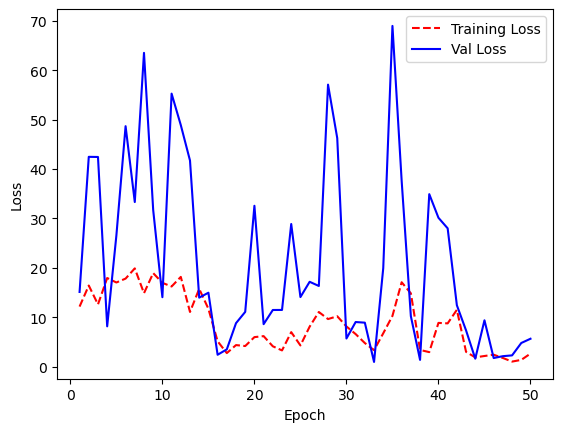

In [72]:
# Get training and test loss histories
training_loss = history1.history['loss']
testing_loss = history1.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, testing_loss, 'b-')
plt.legend(['Training Loss', 'Val Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

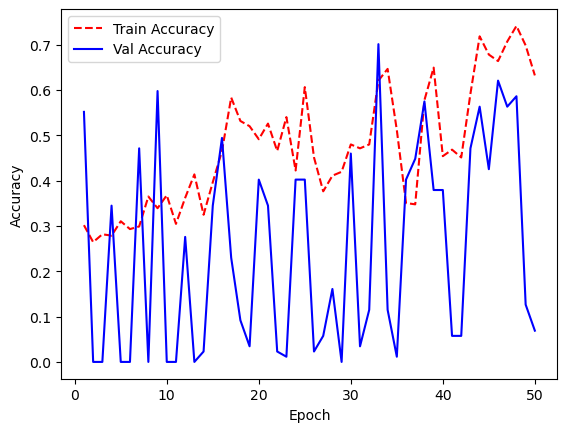

In [73]:
# Testing and Validation Acc for Smote Dataset
accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, accuracy, 'r--')
plt.plot(epoch_count, val_accuracy, 'b-')
plt.legend(['Train Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

In [74]:
y_pred = best_model.predict(X_test_Reshape1)

78/78 [==============================] - 132s 2s/step


C:\Users\eesha\AppData\Local\Temp\ipykernel_10196\616230313.py:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


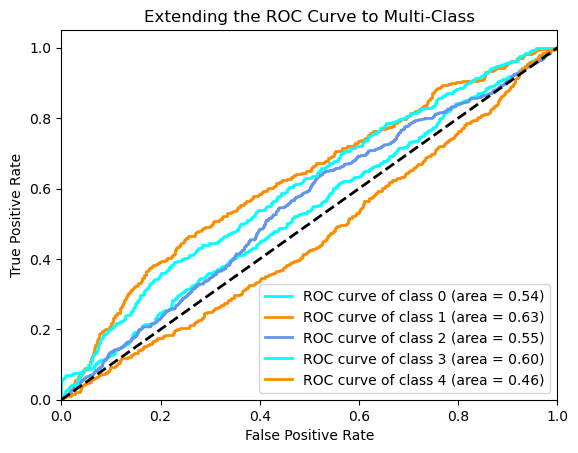

In [78]:
# Process of plotting roc-auc curve belonging to all classes.

from itertools import cycle
roc_auc_scores = []
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    roc_auc_scores.append(roc_auc[i])

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extending the ROC Curve to Multi-Class')
plt.legend(loc="lower right")
plt.show()